In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [37]:
pdata = pd.read_csv('/kaggle/input/titanic/train.csv')
import sklearn
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

EXPLORATORY DATA ANALYSIS

In [38]:
pdata.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [39]:

pdata.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sunderland, Mr. Victor Francis",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [40]:
pdata.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
pdata.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

We only have information on about 23% of the passengers' assigned cabins, and only know the ages of about 80% of the passengers. We also don't know the onboarding destination of two passengers. We'll have to remove these null values before we make any machine learning models.  

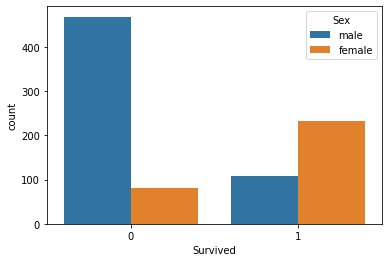

In [42]:
sns.countplot(x='Survived', hue='Sex', data=pdata)

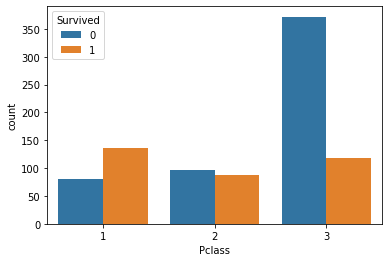

In [43]:
sns.countplot(x='Pclass', hue='Survived', data=pdata)

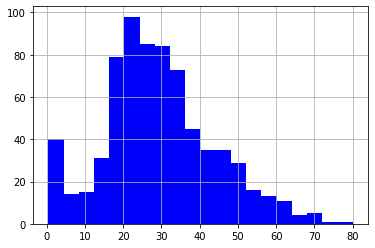

In [44]:
pdata['Age'].hist(bins=20, color='blue')

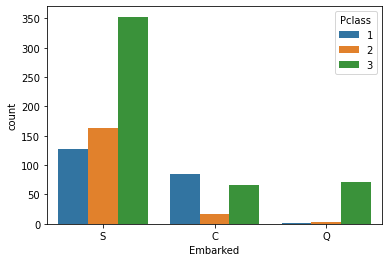

In [45]:
sns.countplot(x='Embarked', hue='Pclass', data=pdata)

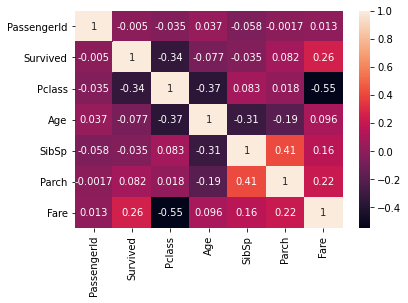

In [46]:
sns.heatmap(pdata.corr(), annot=True)

From these quick visualizations, we see that most passengers boarded at Port S regardless of class and the age range demonstrates a bell-shaped curve with a long left tail. 

FILLING IN MISSING VALUES

In [47]:
age_group = pdata.groupby('Pclass')['Age']
print(round(age_group.mean()), 2)

Pclass
1    38.0
2    30.0
3    25.0
Name: Age, dtype: float64 2


In [48]:
pdata.loc[pdata.Age.isnull(), 'Age']=pdata.groupby('Pclass').Age.transform('median')
print(pdata['Age'].isnull().sum())

0


In [49]:
pdata.drop('Cabin', axis=1, inplace=True)

In [50]:
from statistics import mode
pdata['Embarked']=pdata['Embarked'].fillna(mode(pdata['Embarked']))

In [51]:
import sys
CYAN = "\033[1;36m"
sys.stdout.write(CYAN)
print(pdata.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [52]:
pdata["Sex"][pdata["Sex"] == "male"] = 0
pdata["Sex"][pdata["Sex"] == "female"] = 1
pdata.Sex.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Sex, dtype: object

In [53]:
pdata["Embarked"][pdata["Embarked"] == "S"] = 0
pdata["Embarked"][pdata["Embarked"] == "C"] = 1
pdata["Embarked"][pdata["Embarked"] == "Q"] = 2
pdata.Embarked.head(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doi

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    0
8    0
9    1
Name: Embarked, dtype: object

DECISION TREE REGRESSION

In [54]:
y = pdata.Survived
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Parch']
X = pdata[features]
import sklearn
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
dt_model = DecisionTreeRegressor(max_leaf_nodes=150, random_state=1)
dt_model.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=150,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [56]:
#make predictions and calculate mean absolute error
survival_predictions = dt_model.predict(val_X)
MAE = mean_absolute_error(survival_predictions, val_y)
Accuracy = round(1 - MAE, 2)
print('Decision Tree Model Accuracy:', Accuracy)

Decision Tree Model Accuracy: 0.76


RANDOM FOREST REGRESSION

In [57]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=4)
rf_model.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=4, verbose=0, warm_start=False)

In [58]:
rf_survival_predictions = rf_model.predict(val_X)
rf_mae = mean_absolute_error(rf_survival_predictions, val_y)
rf_accuracy = round(1 - rf_mae, 2)
print('Random Forest Model Accuracy:', rf_accuracy)

Random Forest Model Accuracy: 0.75
